# Heart Model

## IMPORTING LIBRARIES

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


## LOADING DATA

In [15]:
ds = pd.read_csv(r'C:\Users\USER\Desktop\Deep Learning\1.ANN\Heart Failure Prediction\heart_failure_clinical_records_dataset.csv')

In [16]:
ds.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
ds.shape

(299, 13)

In [18]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [19]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


- About the data:

    - age: Age of the patient
    - anaemia: If the patient had the haemoglobin below the normal range
    - creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
    - diabetes: If the patient was diabetic
    - ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
    - high_blood_pressure: If the patient had hypertension
    - platelets: Platelet count of blood in kiloplatelets/mL
    - serum_creatinine: The level of serum creatinine in the blood in mg/dL
    - serum_sodium: The level of serum sodium in the blood in mEq/L
    - sex: The sex of the patient
    - smoking: If the patient smokes actively or ever did in past
    - time: It is the time of the patient's follow-up visit for the disease in months
    - DEATH_EVENT: If the patient deceased during the follow-up period

## DATA ANALYSIS

C:\Users\USER\AppData\Local\Temp\ipykernel_14548\2996756104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= ds["DEATH_EVENT"], palette= cols)


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

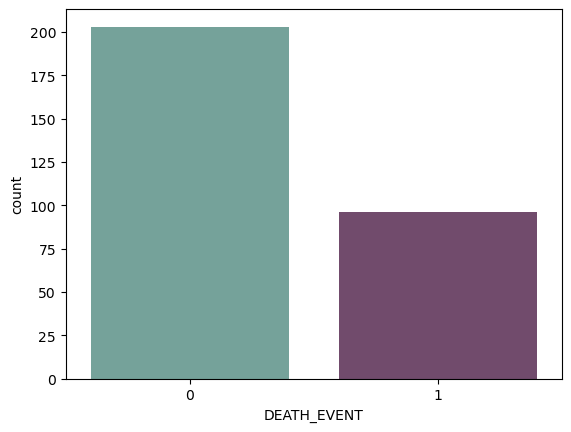

In [20]:
# first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= ds["DEATH_EVENT"], palette= cols)

Point to note is that there is an imbalance in the data.

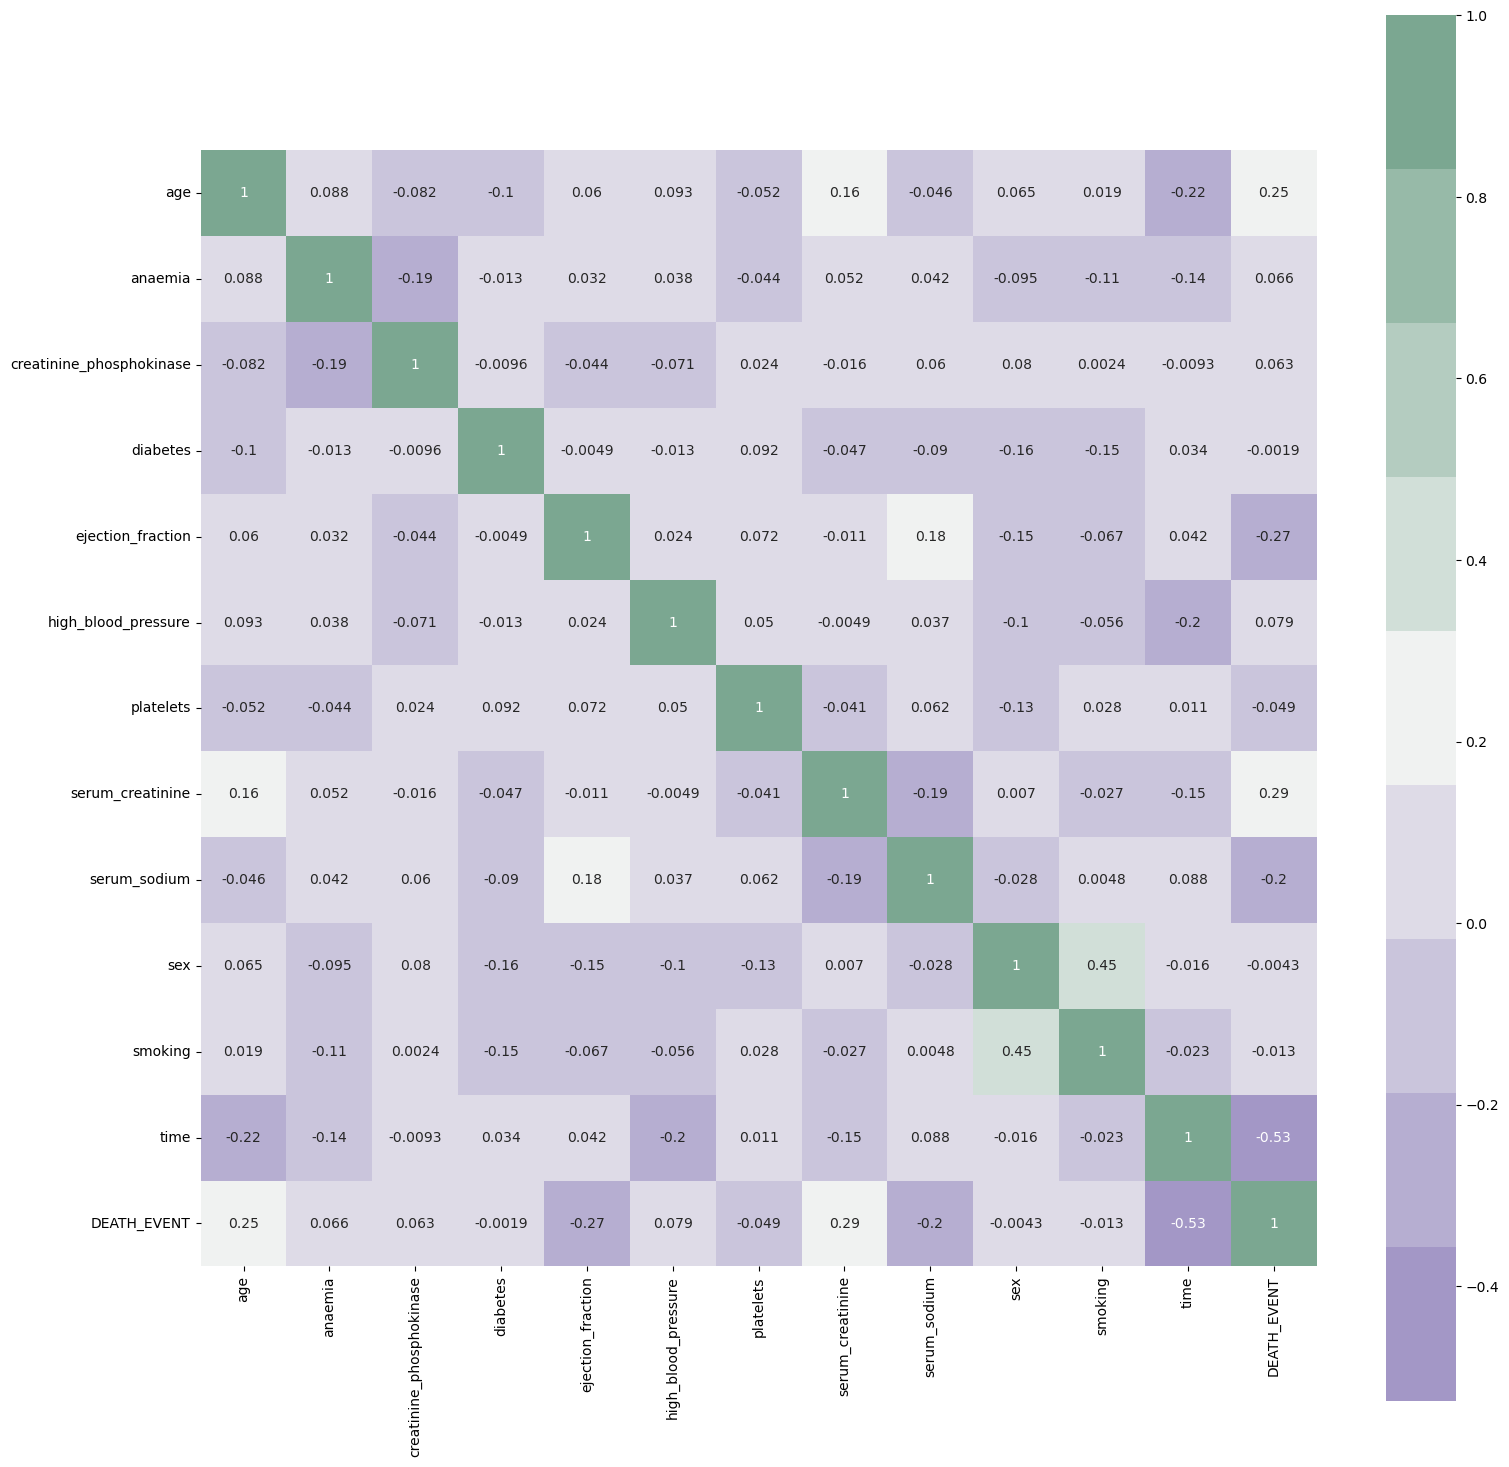

In [21]:
# Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = ds.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

Notable points:

- Time of the patient's follow-up visit for the disease is crucial in as initial diagnosis with cardiovascular issue and treatment reduces the chances of any fatality. It holds and inverse relation.
- Ejection fraction is the second most important feature. It is quite expected as it is basically the efficiency of the heart.
- Age of the patient is the third most correlated feature. Clearly as heart's functioning declines with ageing

Next, we will examine the count plot of age.

Text(0.5, 1.0, 'Distribution Of Age')

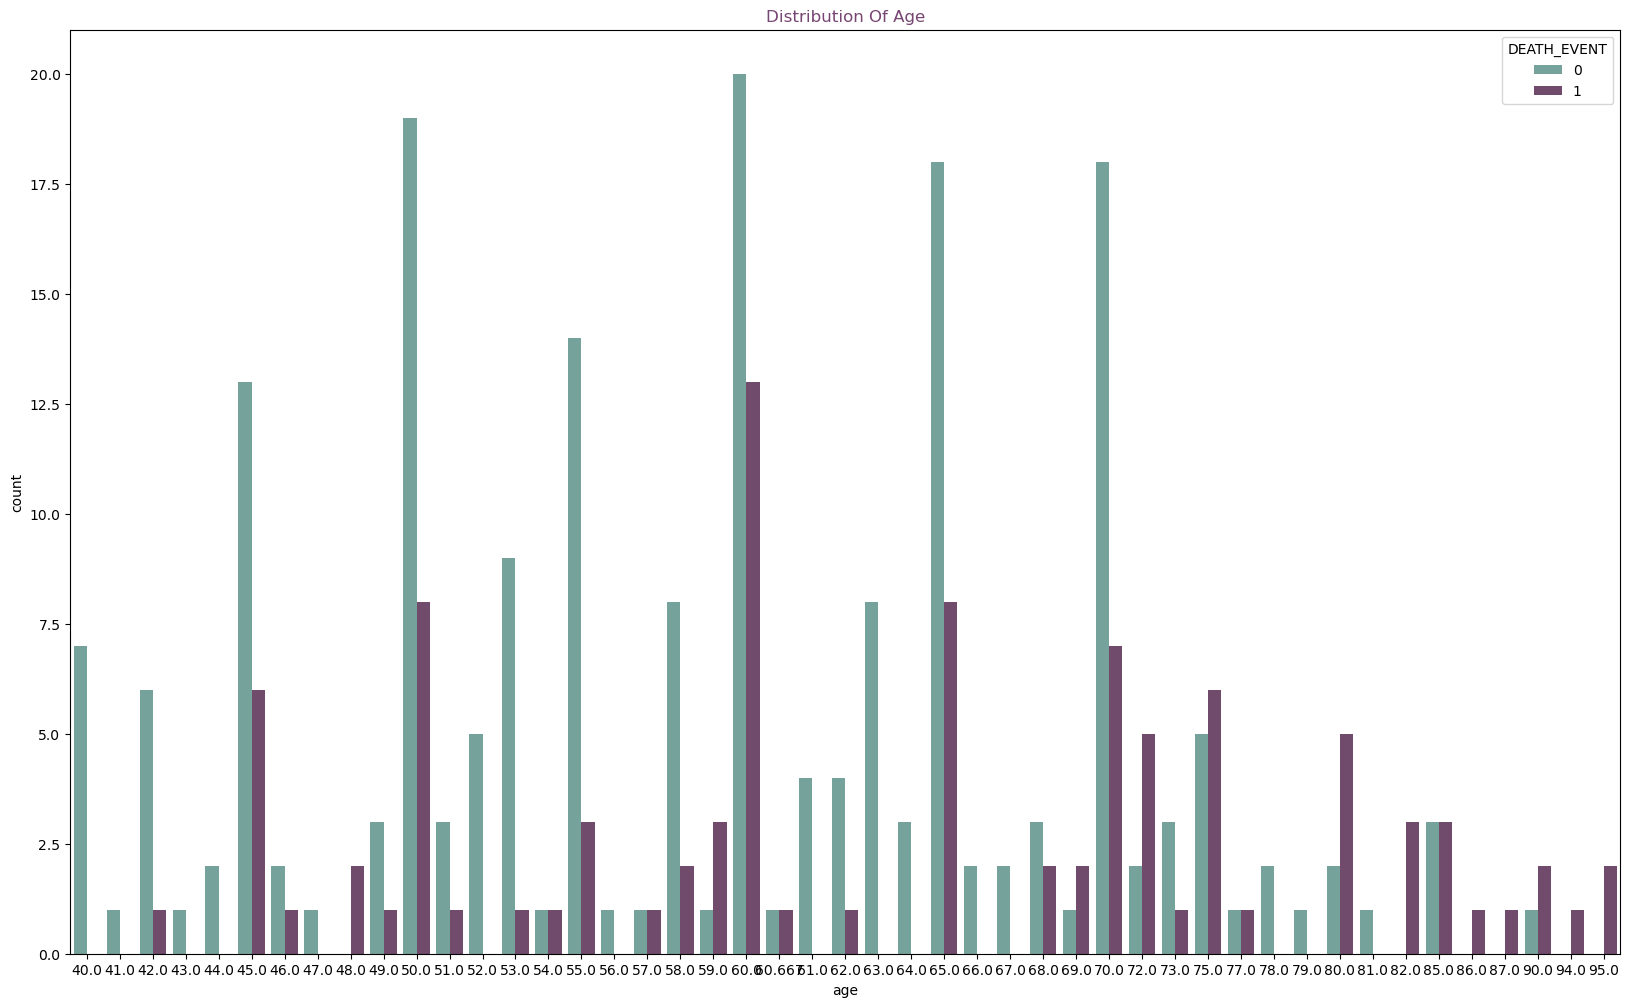

In [22]:
# Evauating age distrivution 
plt.figure(figsize=(20,12))
#colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
Days_of_week=sns.countplot(x=ds['age'],data=ds, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

C:\Users\USER\AppData\Local\Temp\ipykernel_14548\2236889015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=ds["DEATH_EVENT"], y=ds[i], palette=cols)


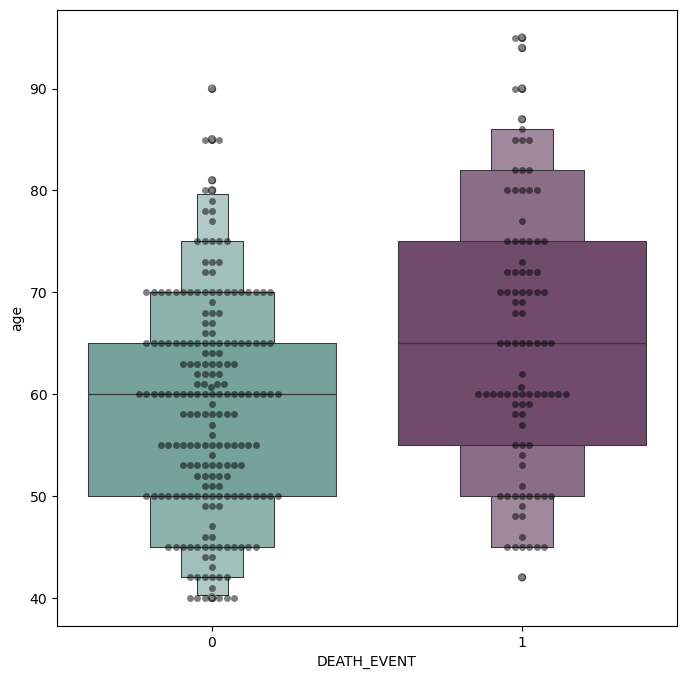

C:\Users\USER\AppData\Local\Temp\ipykernel_14548\2236889015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=ds["DEATH_EVENT"], y=ds[i], palette=cols)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


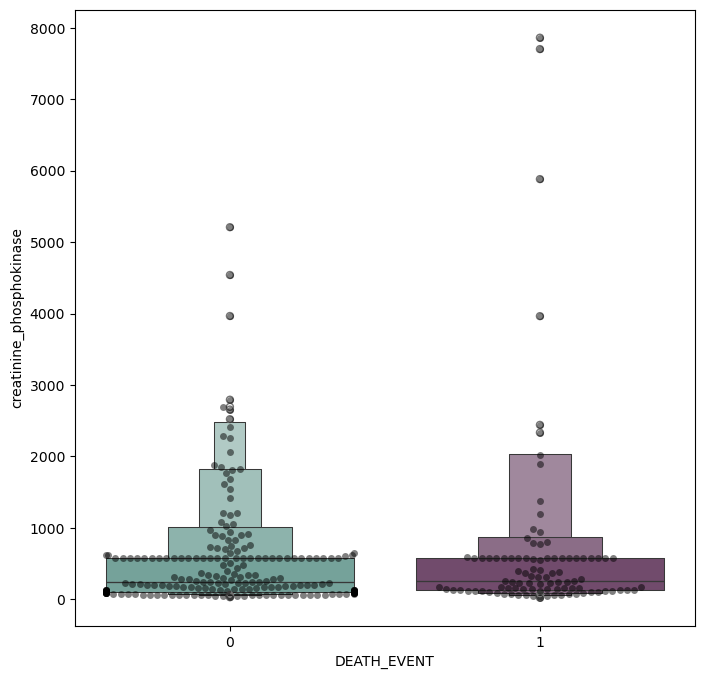

C:\Users\USER\AppData\Local\Temp\ipykernel_14548\2236889015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=ds["DEATH_EVENT"], y=ds[i], palette=cols)


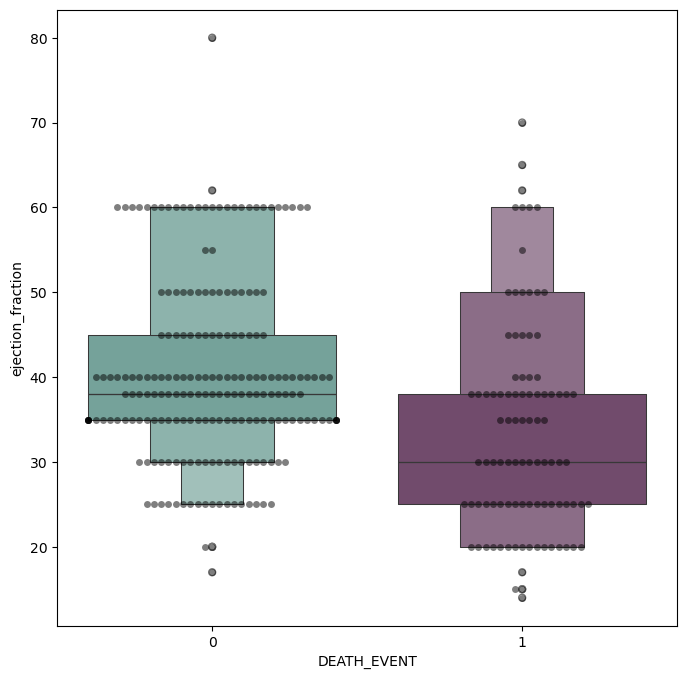

C:\Users\USER\AppData\Local\Temp\ipykernel_14548\2236889015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=ds["DEATH_EVENT"], y=ds[i], palette=cols)


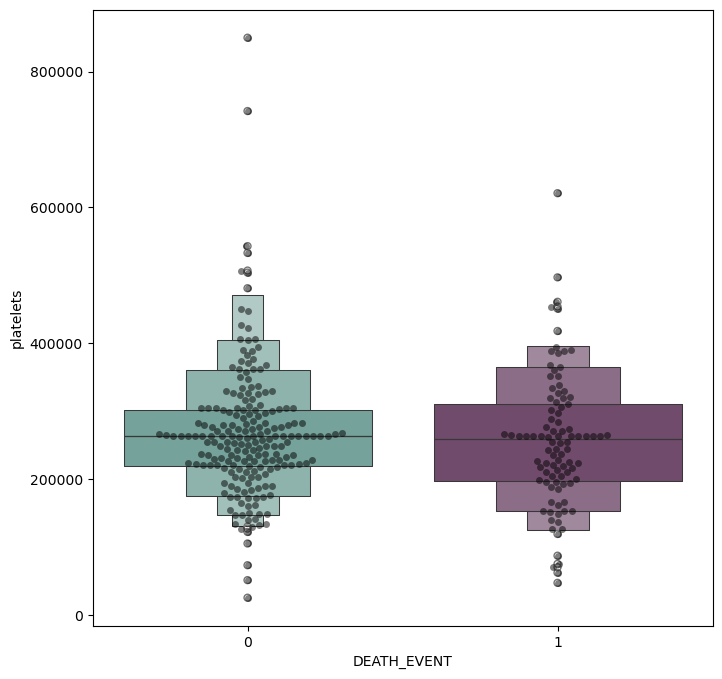

C:\Users\USER\AppData\Local\Temp\ipykernel_14548\2236889015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=ds["DEATH_EVENT"], y=ds[i], palette=cols)


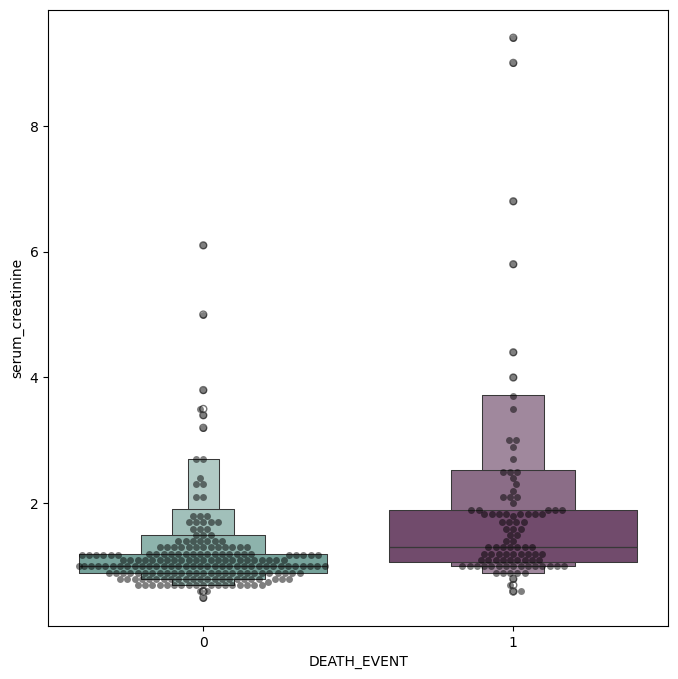

C:\Users\USER\AppData\Local\Temp\ipykernel_14548\2236889015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=ds["DEATH_EVENT"], y=ds[i], palette=cols)


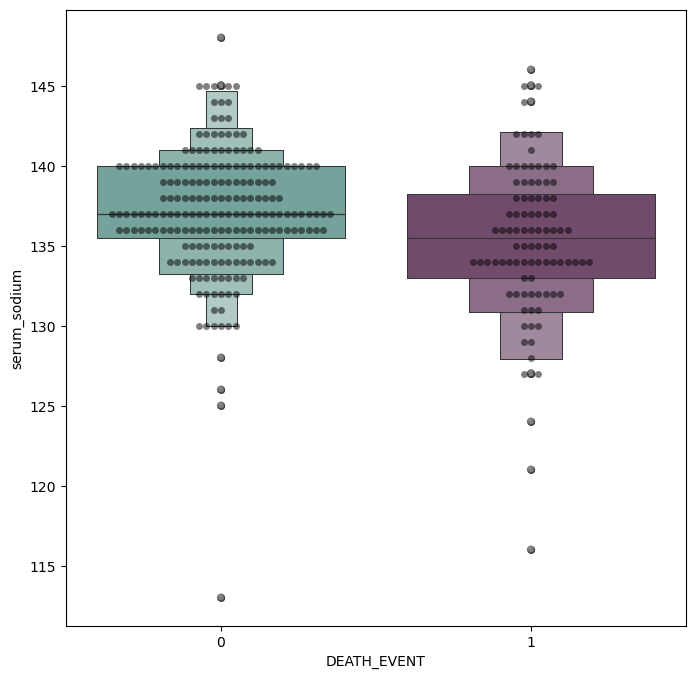

C:\Users\USER\AppData\Local\Temp\ipykernel_14548\2236889015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=ds["DEATH_EVENT"], y=ds[i], palette=cols)


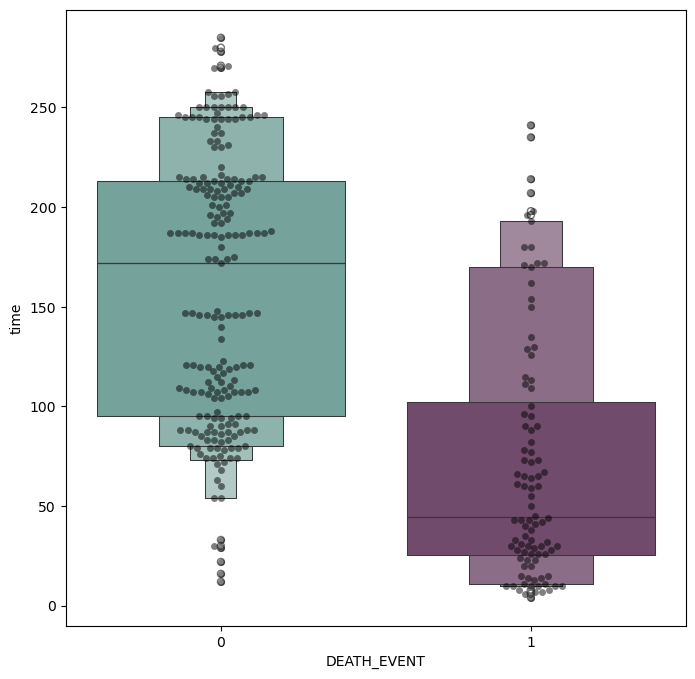

In [23]:
# Boxen and swarm plot of some non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=ds["DEATH_EVENT"], y=ds[i], color="black", alpha=0.5)
    sns.boxenplot(x=ds["DEATH_EVENT"], y=ds[i], palette=cols)
    plt.show()

## DATA PREPROCESSING
Steps involved in Data Preprocessing 

- Dropping the outliers based on data analysis
- Assigning values to features as X and target as y
- Perform the scaling of the features
- Split test and training sets

In [24]:
X = ds.drop(['DEATH_EVENT'], axis = 1)
y = ds['DEATH_EVENT']

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## MODEL BUILDING
In this project, we build an artificial neural network.

Following steps are involved in the model building

    - Initialising the ANN
    - Defining by adding layers
    - Compiling the ANN
    - Train the ANN

✅ What is Early Stopping?

- Early Stopping is a technique used while training deep learning/ANN models to:
- Stop training when the model stops improving
- Prevent overfitting (model performing good on train but bad on test)
- Save time and resources by not training useless extra epochs
- Keep the best learned weights automatically

| Parameter                     | What it does                                                                                              |
| ----------------------------- | --------------------------------------------------------------------------------------------------------- |
| `min_delta = 0.001`           | Minimum improvement required to consider that the model is learning. (If improvement is less → ignore it) |
| `patience = 20`               | Wait for **20 epochs** to see if the model improves again. If not, stop training.                         |
| `restore_best_weights = True` | After stopping, it automatically brings back the **best model weights** instead of last trained weights.  |

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, ReLU

In [33]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))  # input
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))  # 1st 
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))  # 2nd 
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # output 


from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.6911 - loss: 0.6926 - val_accuracy: 0.6875 - val_loss: 0.6920
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6963 - loss: 0.6914 - val_accuracy: 0.6875 - val_loss: 0.6908
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6963 - loss: 0.6903 - val_accuracy: 0.6875 - val_loss: 0.6897
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6963 - loss: 0.6890 - val_accuracy: 0.6875 - val_loss: 0.6885
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6963 - loss: 0.6878 - val_accuracy: 0.6875 - val_loss: 0.6873
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6963 - loss: 0.6866 - val_accuracy: 0.6875 - val_loss: 0.6860
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6963 - loss: 0.6849 - val_accuracy: 0.6875 - val_loss: 0.6847
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6963 - loss: 0.6839 - val_accuracy: 0.6875 - val_loss

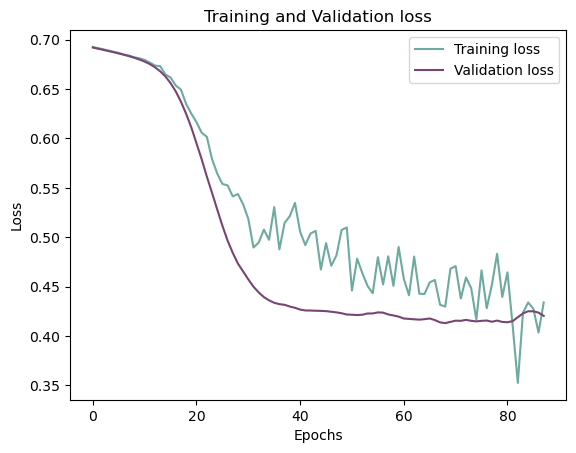

In [35]:
# lotting training and validation loss over epochs

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

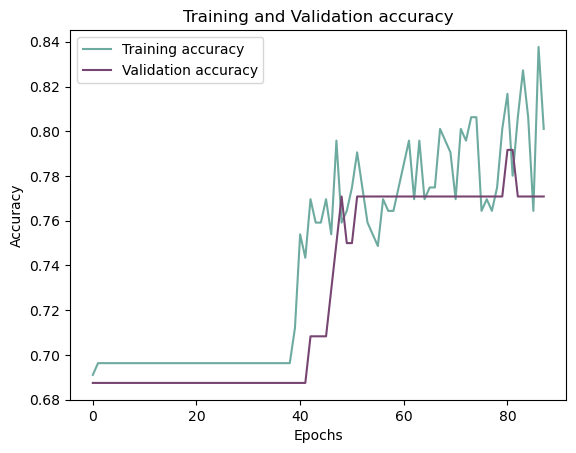

In [36]:
# Plotting training and validation accuracy over epochs

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## CONCLUSIONS¶
Concluding the model with:

- Testing on the test set
- Evaluating the confusion matrix
- Evaluating the classification report

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# 1️⃣ Predict on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities → True/False (0/1)

# 2️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("📌 Confusion Matrix:\n", cm)

# 3️⃣ Accuracy Score
acc = accuracy_score(y_test, y_pred)
print("\n✅ Accuracy:", acc)

# 4️⃣ Full Performance Report
report = classification_report(y_test, y_pred)
print("\n📊 Classification Report:\n", report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
📌 Confusion Matrix:
 [[35  2]
 [11 12]]

✅ Accuracy: 0.7833333333333333

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.84        37
           1       0.86      0.52      0.65        23

    accuracy                           0.78        60
   macro avg       0.81      0.73      0.75        60
weighted avg       0.80      0.78      0.77        60

